<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Откройте-файлы-с-данными-и-объедините-их-в-один-датафрейм." data-toc-modified-id="Откройте-файлы-с-данными-и-объедините-их-в-один-датафрейм.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Откройте файлы с данными и объедините их в один датафрейм.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверьте-типы-данных" data-toc-modified-id="Проверьте-типы-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверьте типы данных</a></span></li><li><span><a href="#Изучите-пропуски-в-датафрейме" data-toc-modified-id="Изучите-пропуски-в-датафрейме-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучите пропуски в датафрейме</a></span></li><li><span><a href="#Изучите-дубликаты-в-датафрейме" data-toc-modified-id="Изучите-дубликаты-в-датафрейме-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изучите дубликаты в датафрейме</a></span></li><li><span><a href="#Изучите-категориальные-значения" data-toc-modified-id="Изучите-категориальные-значения-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изучите категориальные значения</a></span></li><li><span><a href="#Проверьте-количественные-значения" data-toc-modified-id="Проверьте-количественные-значения-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверьте количественные значения</a></span></li><li><span><a href="#Добавьте-новые-столбцы" data-toc-modified-id="Добавьте-новые-столбцы-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Добавьте новые столбцы</a></span></li></ul></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span></li><li><span><a href="#Исследуйте-фильмы,-которые-получили-государственную-поддержку" data-toc-modified-id="Исследуйте-фильмы,-которые-получили-государственную-поддержку-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследуйте фильмы, которые получили государственную поддержку</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование данных о российском кинопрокате

## Описание проекта

**Заказчик**

Министерство культуры Российской Федерации.

**Задача**
Изучить рынок российского кинопроката и выявить текущие тренды.  Особое внимание уделено фильмам, которые получили государственную поддержку.  Основной вопрос, насколько фильмы, которые получили государственную поддержку, интересны зрителю.

**Данные**

Открытые данные, опубликованные на портале Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

## Откройте файлы с данными и объедините их в один датафрейм. 

In [1]:
import pandas as pd # импорт библиотек
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
server_path_mkrf_movies = '/datasets/mkrf_movies.csv' #сохраняем путь к файлу на сервере Практикума
server_path_mkrf_shows = '/datasets/mkrf_shows.csv'
local_path_mkrf_movies = 'datasets/mkrf_movies.csv'  #сохраняем путь к файлу на компьютере 
local_path_mkrf_shows = 'datasets/mkrf_shows.csv'

try:
    mkrf_movies = pd.read_csv(server_path_mkrf_movies) #чтение данных из файлов 
    mkrf_shows = pd.read_csv(server_path_mkrf_shows)    #пробуем найти данные по сетевому адресу
except: 
    mkrf_movies = pd.read_csv(local_path_mkrf_movies) #чтение данных из файлов 
    mkrf_shows = pd.read_csv(local_path_mkrf_shows)    #если не находим по сетевому, ищем по локальному

In [4]:
mkrf_movies.info() #проверка типов данных первого датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce').fillna(0).astype('int64')
# Перевод в тип данных int64 

In [6]:
mkrf_shows.info() #проверка типов данных второго датасета 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
mkrf_movies = mkrf_movies.merge( # объединение двух датасетов
    mkrf_shows,
    how='left',
    on='puNumber' 
)

In [8]:
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
mkrf_movies.info() # объединенный датасат, в колонке puNumber было одно испорченное значение теперь оно равно 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [10]:
mkrf_movies = mkrf_movies.rename(columns={  # переименование колонке puNumber
     'puNumber': 'pu_number'})

## Предобработка данных

### Проверьте типы данных

Первод возможен для двух колонок:
- `show_start_date` тип datetime
- `ratings` на float, часть данных в формате процентов

In [11]:
mkrf_movies['ratings'].unique() # проверка уникальных значений

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [12]:
mkrf_movies['ratings'] = pd.to_numeric( # перевод в действительные числа 
    mkrf_movies['ratings'].str.replace('%', ''),
    errors='coerce'
)

In [13]:
mkrf_movies.loc[mkrf_movies['ratings'] > 10, 'ratings'] = mkrf_movies['ratings'] / 10 # первод к единой шкале  

In [14]:
mkrf_movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [15]:
mkrf_movies['show_start_date'] = pd.to_datetime(mkrf_movies['show_start_date'], format='%Y-%m-%d')
# перевод к типу datetime

In [16]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

### Изучите пропуски в датафрейме

In [17]:
mkrf_movies.isna().sum() #сумма значений NaN по колонкам

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

- film_studio – не у всех фильмов есть студии, заменить на unknown;                
- production_country – скорее всего значение пропущено там всего 2 заменить на unknown;        
- director – не у всех фильмов есть режиссёр, это трансляции концертов и т.д, заменить на unknown;                   
- producer - не у всех фильмов есть продюсер, например это характерно для фильмов из СССР, заменить на unknown;             
- refundable_support, nonrefundable_support, budget, financing_source – данные есть только для фильмов с гос. участием, нет смысла заполнять эти значения;       
- ratings – рейтинг ли не вычислялся из-за недостаточности оценок или его нет, доля значительная 0.13 присвоение средних или медианных значений не желательно;                 
- genres – жанр не определен, заменить на unknown;                     
- box_office – изначально не было данных для всех фильмов а т.к мы использовали «левой объединение» они автоматически заполнились NaN.              

In [18]:
for column in ['film_studio', 'director', 'producer', 'genres', 'production_country']: # Перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
    mkrf_movies[column] =  mkrf_movies[column].fillna('unknown')

### Изучите дубликаты в датафрейме

In [19]:
mkrf_movies['pu_number'].duplicated().sum() # подсчёт явных дубликатов по колонке pu_number

2

In [20]:
mkrf_movies = mkrf_movies.drop_duplicates(subset='pu_number').reset_index(drop=True) # замена дубликатов

In [21]:
mkrf_movies[['title', 'director']].duplicated().sum() # подсчёт явных дубликатов по колонке 'title', 'director'

682

In [22]:
mkrf_movies[['title', 'director', 'show_start_date', 'box_office']].duplicated().sum()
# подсчёт явных дубликатов по колонке 'title', 'director', 'show_start_date', 'box_office'

5

Если просмотреть явные дубликаты по колонкам `title`, `director` то получим 682 дубликата, но при этом если добавит значения из колонки `show_start_date` и `box_office` то картина резко меняется всего 5. 

Один и тоже фильм имеет разные прокатные удостоверения и дату премьеры фильма. 

Но есть 5 записей, где все совпадает кроме номера удостоверения, скорее всего при агрегации данных с разных источников, где-то были допущены ошибки в номерах.   

In [23]:
mkrf_movies = mkrf_movies.drop_duplicates(    # замена дубликатов
    subset=['title', 'director', 'show_start_date', 'box_office']
).reset_index(drop=True)

### Изучите категориальные значения

In [24]:
mkrf_movies['production_country'].unique()
# как пример уникальные значения колонки production_country  огромное количество значений

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

**Для категориальных колонок характерны следующие проблемы:**
- данные не атомарные, что сильно затрудняет их анализ;
- одни и те же данные могут быть записаны по-разному, нет единого формата хотя бы в рамках одной колонки, например страны происхождения могут как быть разделены запятыми, так и дефисами, или идти в другом порядке, или имя режиссёра может быть полным или только инициалы т.д.; 
- опечатки, описки, лишние символы т.д.

In [25]:
mkrf_movies['type'].unique() #уникальны значения колонки type

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [26]:
mkrf_movies['type'] = mkrf_movies['type'].str.strip() #убираем лишние пробелы

In [27]:
mkrf_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

### Проверьте количественные значения

In [28]:
mkrf_movies[mkrf_movies['budget'] <= mkrf_movies['nonrefundable_support']]['title'].count() # проверка 

17

In [29]:
mkrf_movies.loc[mkrf_movies['budget'] <= mkrf_movies['nonrefundable_support'], [
    'budget',
    'nonrefundable_support',
    'refundable_support']]

,budget,nonrefundable_support,refundable_support
2051,0.0,23000000.0,0.0
2056,0.0,75000000.0,0.0
2470,0.0,70000000.0,10000000.0
2530,0.0,0.0,20000000.0
2613,0.0,100000000.0,60000000.0
2682,0.0,59000000.0,0.0
2786,0.0,35000000.0,0.0
2872,0.0,6000000.0,0.0
3045,0.0,51000000.0,19000000.0
3563,0.0,250000000.0,0.0


Колонка `budget` в 17 записях содержит значения 0 при том что значения колонки `refundable_support` или `nonrefundable_support` не равны 0, что не может быть т.к.  значение колонки включает сумму значений этих колонок плюс еще какие-то средства.

Остаток нам не известен, для исправления ситуации предлагаю включить сумму этих колонок `refundable_support` и `nonrefundable_support` в колонку `budget`.

In [30]:
mkrf_movies.loc[mkrf_movies['budget'] <= mkrf_movies['nonrefundable_support'], 'budget'] = mkrf_movies['nonrefundable_support'] + mkrf_movies['refundable_support']

In [31]:
columns = {              #словарь колонка с параметрами для построения гистограмм 
    'refundable_support': [20], # ключ название колонки значение [количество корзин]
    'nonrefundable_support': [20],
    'budget': [20],
    'ratings': [10],
    'box_office':[20]
}

In [32]:
mkrf_movies[columns].describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,6513.000000,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.314224e+08,6.488684,7.647870e+07
std,2.491656e+07,5.998012e+07,1.871482e+08,1.113947,2.403531e+08
min,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.552480e+07,5.900000,8.623900e+04
50%,0.000000e+00,3.000000e+07,7.119690e+07,6.600000,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.500000e+08,7.200000,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


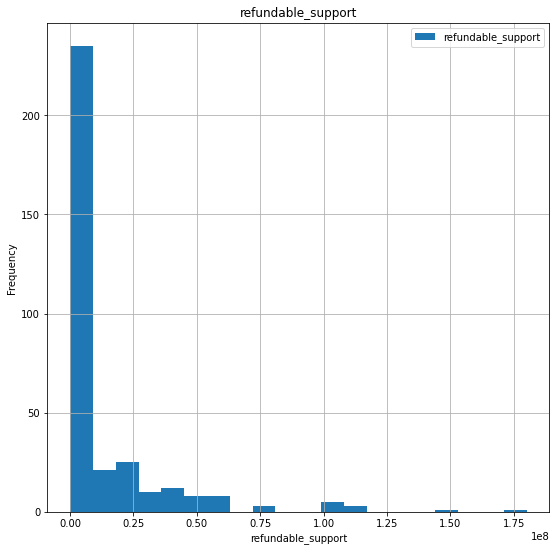

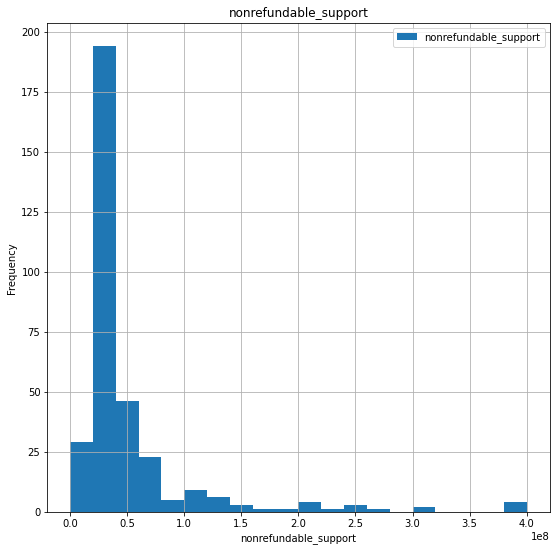

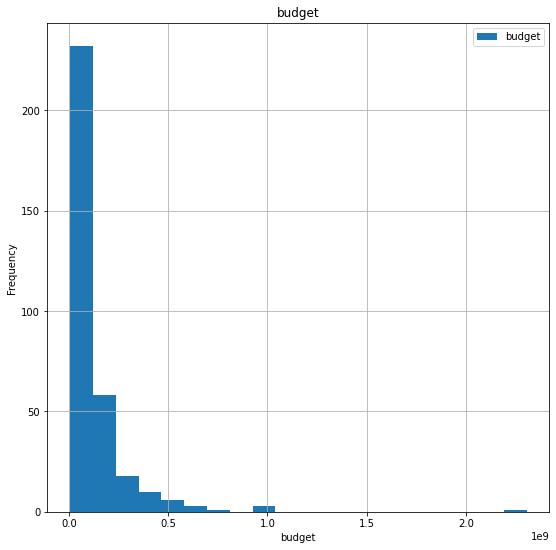

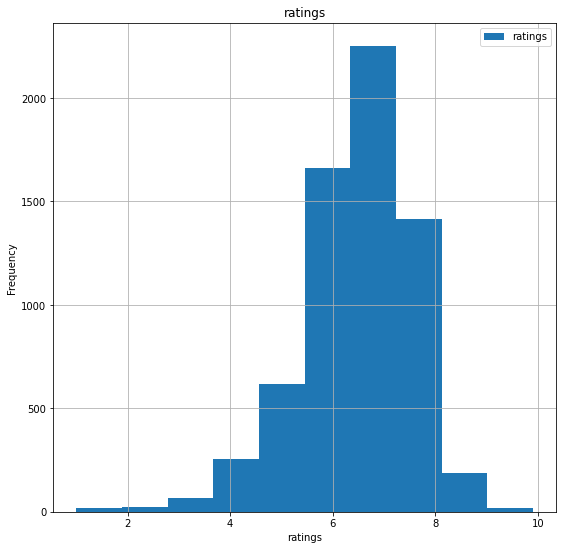

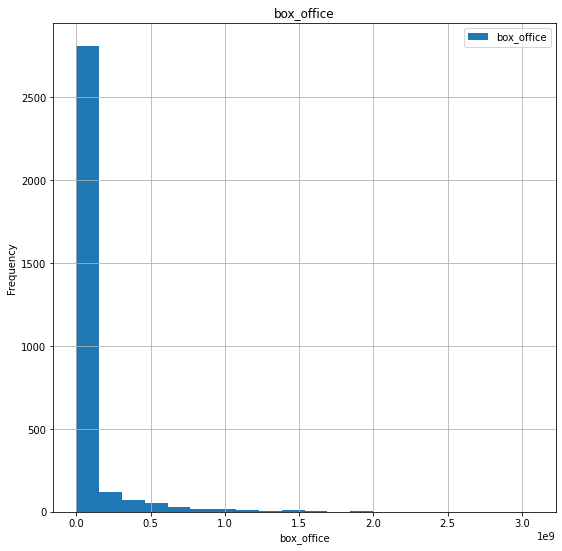

In [33]:
for key, val in columns.items(): #цыкл для построения гистограмм по колонкам
        mkrf_movies.plot(
            y=key, 
            bins=val[0], 
            title=key, 
            kind='hist', 
            figsize=(9, 9),
            grid=True
        )
        plt.xlabel(key)
        plt.show()

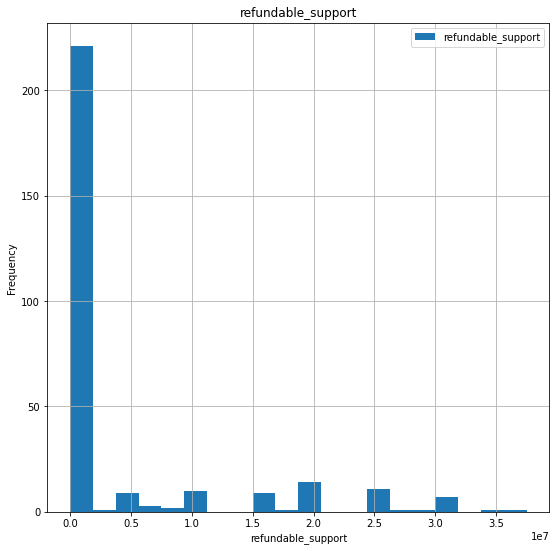

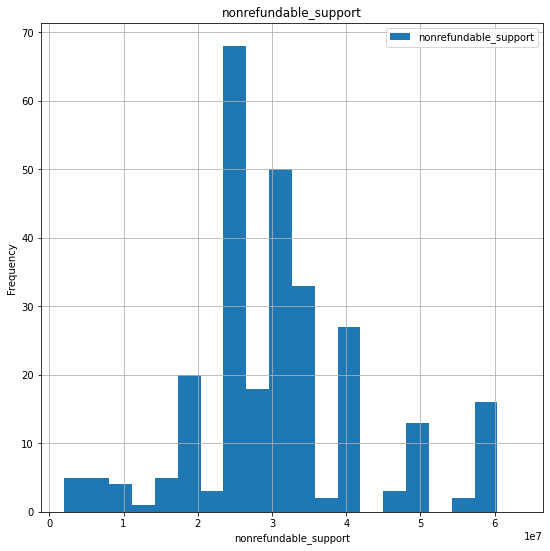

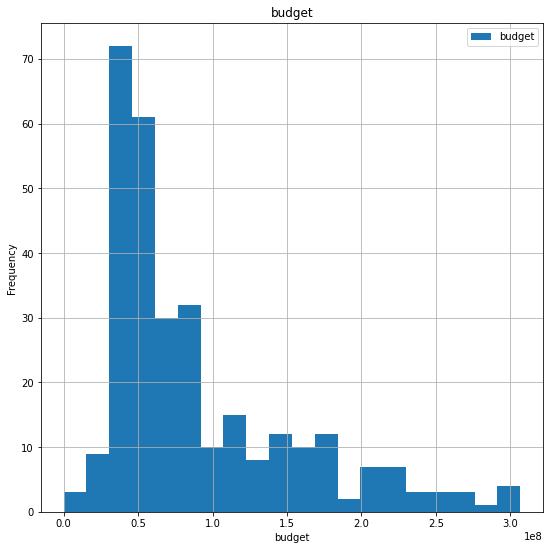

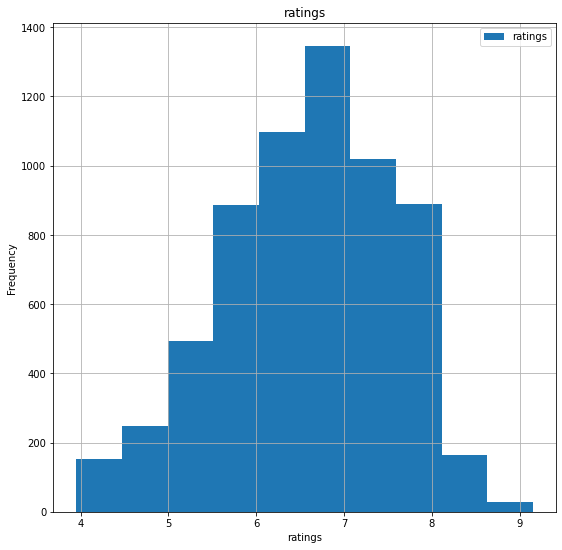

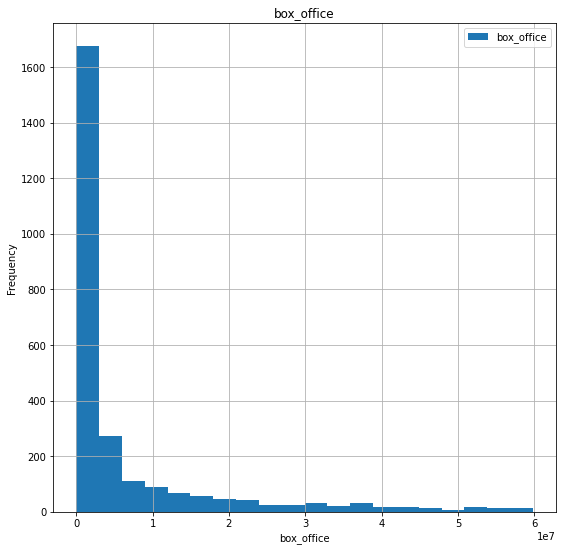

In [34]:
for key, val in columns.items(): #цыкл для построения гистограмм по колонкам в рамках размаха в 1.5 IQR
        q1 = mkrf_movies[key].quantile(0.25)
        q3 = mkrf_movies[key].quantile(0.75)
        iqr = q3 - q1
        if q1 - 1.5 * iqr < 0: # нет отрицательных значений
            fence_low = 0
        else:
            fence_low  = q1 - 1.5 * iqr
        fence_high = q3 + 1.5 * iqr
        mkrf_movies.plot(
            y=key, 
            bins=val[0], 
            title=key, 
            kind='hist', 
            range=(fence_low, fence_high),
            figsize=(9, 9),
            grid=True
        )
        plt.xlabel(key)
        plt.show()

### Добавьте новые столбцы

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [35]:
mkrf_movies['show_year'] = mkrf_movies['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [36]:
# Объявление функции first_value с параметром value,
# которая получает значение и переводить его в сороковую применяю и
# возвращает последовательность символов до первой запятой.

def first_value(value):  
    return str(value).split(',')[0]    

In [37]:
mkrf_movies['main_director'] = mkrf_movies['director'].apply(first_value) # добавление колонки с главным режиссёром 
mkrf_movies['main_genre'] = mkrf_movies['genres'].apply(first_value) # добавление колонки с главным жанром 

In [38]:
mkrf_movies['main_director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [39]:
mkrf_movies['main_genre'].unique()

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'unknown', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [40]:
mkrf_movies['state_budget_share'] = round((mkrf_movies['nonrefundable_support'] + mkrf_movies['refundable_support']) / mkrf_movies['budget'], 3)

In [41]:
mkrf_movies['state_budget_share'].describe()

count    332.000000
mean       0.542084
std        0.196928
min        0.044000
25%        0.385000
50%        0.614000
75%        0.661250
max        1.000000
Name: state_budget_share, dtype: float64

## Проведите исследовательский анализ данных

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

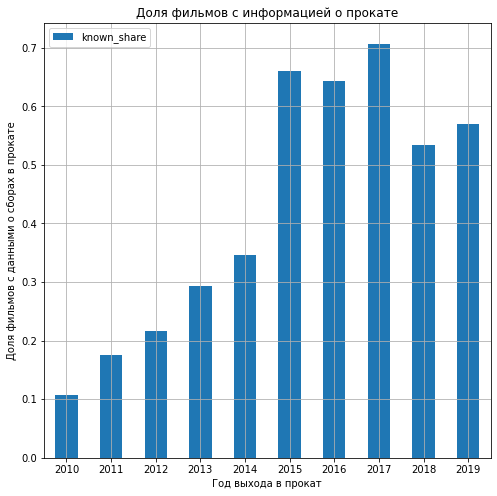

In [42]:
mkrf_movies.loc[mkrf_movies['box_office'].notna()].pivot_table( # подсчет фильмов по годам с информацией о прокате
                index='show_year',
                values='pu_number',
                 aggfunc='count'
).merge(mkrf_movies.pivot_table(                             # подсчет фильмов по годам без информации о прокате
                index='show_year',
                values='pu_number',
                aggfunc='count'),
       how='inner',
       on='show_year'
).assign(
    known_share=lambda x: round(x.pu_number_x / x.pu_number_y, 3) # расчет доли 
).plot(                                                           # построение столбчатой диаграммы для наглядности  
    y='known_share',
    kind='bar',
    figsize=(8, 8),
    grid=True,
    title = 'Доля фильмов с информацией о прокате'
)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Год выхода в прокат')
plt.ylabel('Доля фильмов с данными о сборах в прокате')
plt.show()

**Вывод:** Период с 2015 по 2019 полнее всего представлен в данных

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [43]:
pd.options.display.float_format = '{:.2f}'.format
mkrf_movies.pivot_table( # кассовые сборы по годам
                index='show_year',
                values='box_office',
                aggfunc='sum'
).sort_values(
    by='box_office', 
    ascending=False
)

,box_office
show_year,
2018,49668403134.32
2017,48563707217.51
2019,48425708779.59
2016,47866299741.91
2015,39497365196.40
2014,7444951859.20
2013,29799706.20
2011,14102765.00
2012,6955423.00


**Вывод:** 
- 2010 - минимальные сборы,
- 2018 - максимальные сборы.
    
разница в 20000 раз

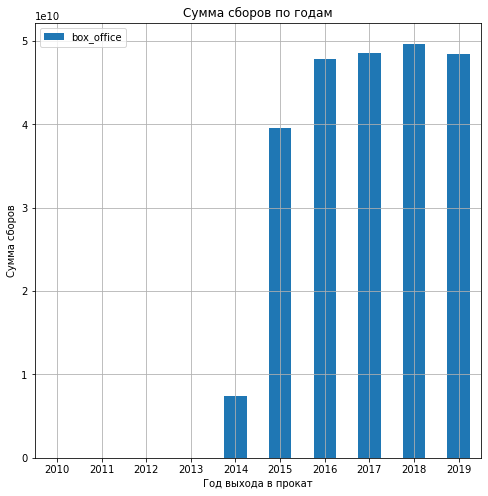

In [44]:
mkrf_movies.pivot_table(   # построение столбчатой диаграммы для наглядности 
                index='show_year',
                values='box_office',
                aggfunc='sum'
).plot(                                                       
    kind='bar',
    figsize=(8, 8),
    grid=True,
    title = 'Сумма сборов по годам'
)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Год выхода в прокат')
plt.ylabel('Сумма сборов')
plt.show()

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [45]:
mkrf_movies.pivot_table( # на диаграме не видны все значения вывод самой таблицы
                index='show_year',
                values='box_office',
                aggfunc=['mean', 'median']
)

,mean,median
,box_office,box_office
show_year,,
2010,23130.04,1700.00
2011,129383.17,3000.00
2012,54339.24,5660.00
2013,161954.92,3522.50
2014,26684415.27,18160.00
2015,84940570.31,4920933.00
2016,91000569.85,3846679.41
2017,136032793.33,9968340.00


**Вывод:** Судя по значительной разнице между средними и медианными значениями сборы очень не однородны:
Есть несколько лидеров каждый год, на долю, которых приходится осононая касса, а дальше большой разрыв  

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [46]:
# Объявление функции age_restriction с параметром data и   agg_func, 
# которая строить графики сборов (средних, медиан и т.д в зависимости от agg_func) фильмов по годам (с 2015 по 2019) и по категориям

def age_restriction(data, agg_func='sum'):
    age_box = data.query('show_year >= 2015').pivot_table( # создание сводной таблицы по годам и категориям
                index='show_year',
                columns='age_restriction',
                values='box_office',
                aggfunc=agg_func
    )
    age_box.columns = ['0+', '12+', '16+', '18+', '6+'] # переименование колонок 
    fig, ax = plt.subplots(figsize=(12, 12)) # размер поля 
    plt.title('Распределение возрастных категорий по годам ', fontsize=20)
    plt.xlabel('Год',  fontsize=12)
    plt.ylabel(agg_func,  fontsize=12)
    ax.plot(age_box) # вовод графиков 
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # шкала деления для оси х
    plt.legend(age_box.columns)
    plt.grid(True)
    plt.show()

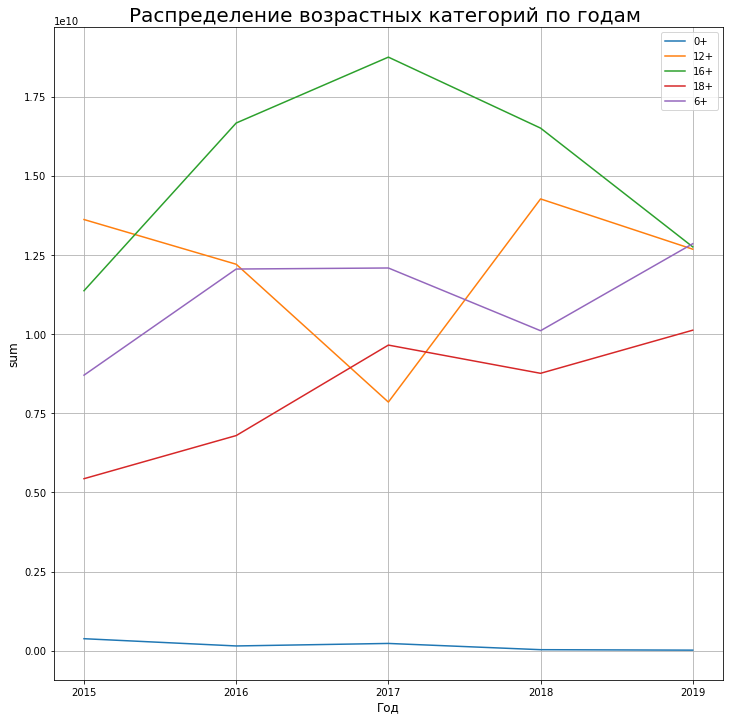

In [47]:
age_restriction(mkrf_movies, agg_func = 'sum')  # вызов функции на построение графика для всего датасета

In [48]:
mkrf_movies.query('show_year == 2017')[['title', 'age_restriction', 'box_office']].sort_values(
    by='box_office',
    ascending=False
).head(10) # первая десятка за 2017 год

,title,age_restriction,box_office
5648,Движение вверх,«6+» - для детей старше 6 лет,2779686144.00
3486,Пираты Карибского моря: Мертвецы не рассказыва...,«16+» - для детей старше 16 лет,2118396119.00
5500,Последний богатырь,«12+» - для детей старше 12 лет,1655037688.00
3521,Стражи Галактики. Часть 2,«16+» - для детей старше 16 лет,1468779681.00
3369,Форсаж 8,«12+» - для детей старше 12 лет,1429976813.00
3740,Гадкий я 3,«6+» - для детей старше 6 лет,1390392637.00
3233,Босс-Молокосос,«6+» - для детей старше 6 лет,1376726723.00
5649,Джуманджи: Зов джунглей,«16+» - для детей старше 16 лет,1246587858.00
5543,Тор: Рагнарёк,«16+» - для детей старше 16 лет,1229588275.00
5468,Оно,«18+» - запрещено для детей,1036725434.00


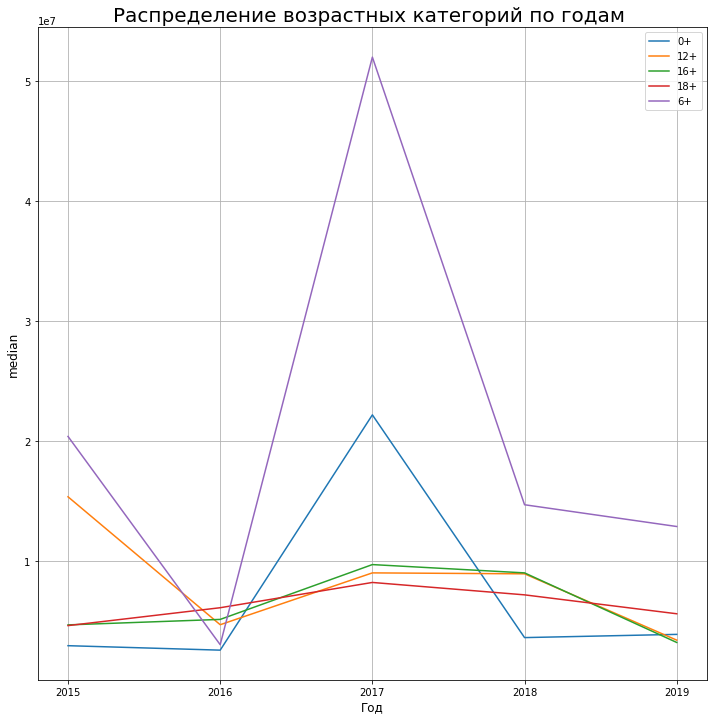

In [49]:
age_restriction(mkrf_movies, agg_func = 'median')  # вызов функции на построение графика для всего датасета по медианам

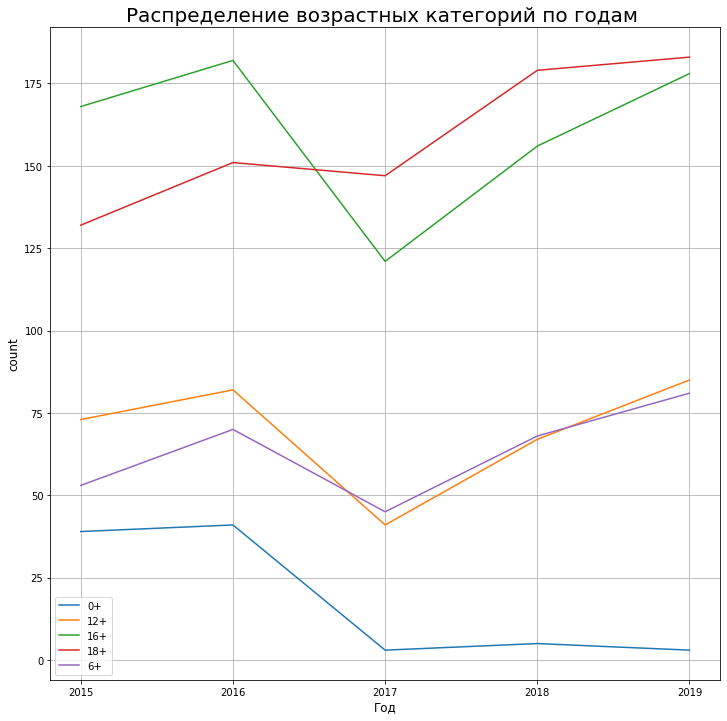

In [50]:
age_restriction(mkrf_movies, agg_func = 'count')

**Вывод:** 
- Категория 0+ самая не прибыльная и с годами даже но снижается, т.к совсем меленьким зрителям сложно концентрироваться долгое время, контент для этой аудитории скорее для домашнего просмотра чем для кинотеатров.
- Категории 6+ и 18+ имеют рост, несмотря на провал в 2018 (для этого рода характерен общее снижение), Особенно 18+, это связано с тем, что в последние годы киноиндустрия становится более лояльна к этому рейтингу и смещает акцент с подростковой аудитории на более возрастную, чего раньше избегали особенно для крупных проектов.
- И две самые интересные категории это 16+ и 12+ это подростковые категории, между ними довольно тонкая грань иногда достаточно переделать пару сцен, и рейтинг измениться. Эти категории в совокупности обычно приносят основной доход и борются за аудиторию. Как хорошо видно на графике, там, где одна категория растет, другая падает (особенно 2017). А если бы парочке блокбастеров выдали бы категории 12+, а не 16+ картина бы поменялась. 

## Исследуйте фильмы, которые получили государственную поддержку

- Доля государственной поддержки в бюджете. 

In [51]:
gov_movies = mkrf_movies[mkrf_movies['budget'].notna()] # выделение фильмов с с государственным участием 

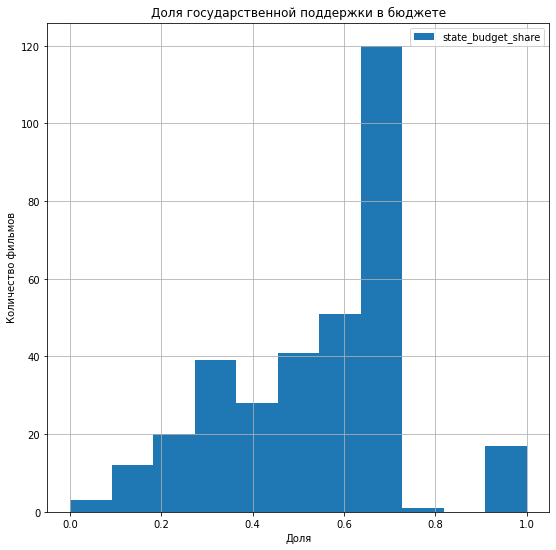

In [52]:
gov_movies.plot(               # Доля государственной поддержки в бюджете фильмов
        y='state_budget_share', 
        bins=11, 
        title='Доля государственной поддержки в бюджете', 
        kind='hist', 
        range=(0, 1),
        figsize=(9, 9),
        grid=True
)
plt.xlabel('Доля')
plt.ylabel('Количество фильмов')
plt.show()

На долю государственной поддержки приходится 65-70 % что достаточно высоко, отечественному кино сложно привлекать частные инвестиции. 

- Отношение возвратных средств к общему числу средств государства по годам

In [53]:
gov_movies.assign(
    return_share=lambda x: round(x.refundable_support / (x.refundable_support + x.nonrefundable_support), 4)
).pivot_table(
    index='show_year',
    values='return_share',
    aggfunc=['mean', 'count']
)

,mean,count
,return_share,return_share
show_year,,
2013,0.00,2
2014,0.10,16
2015,0.15,86
2016,0.15,61
2017,0.20,41
2018,0.13,56
2019,0.11,70


Возвратные средства составляют в среднем 14% от общей доли вложенных средств, причем до 2017 этот показатель рос после, он начал снижется.

- Степень окупаемости по годам

In [54]:
gov_movies = gov_movies.assign(    # добавление колонки окупаемость 
    payback=lambda x: round(x.box_office / (x.budget), 4)
) 

In [55]:
gov_movies.pivot_table( # сводная средней окупаемости по годам
    index='show_year',
    values='payback',
)

,payback
show_year,
2013,0.06
2014,0.61
2015,0.62
2016,0.70
2017,1.03
2018,1.16
2019,0.88


В 2017 и 2018 отечественное кино имела небольшую окупаемость.

- Влияние оценки на окупаемость

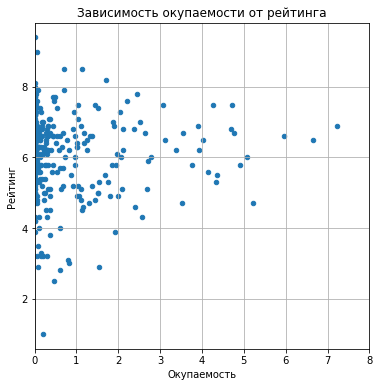

In [56]:
gov_movies.plot( # график зависимости окупаемости от рейтинга  
    y='ratings',
    x='payback',
    kind='scatter',
    figsize=(6, 6),
    title='Зависимость окупаемости от рейтинга',
    grid=True
)
plt.xlim([0, 8])
plt.xlabel('Окупаемость')
plt.ylabel('Рейтинг')
plt.show()

In [57]:
gov_movies['ratings'].corr(gov_movies['payback']) # коэффициент корреляции 

0.05593230854158744

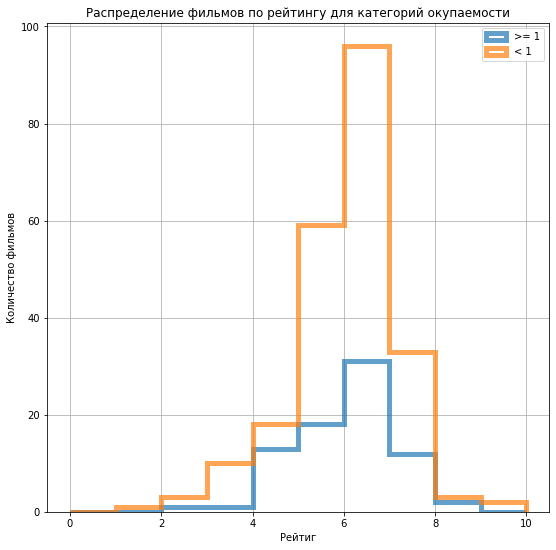

In [58]:
ax = gov_movies.query('payback >= 1').plot(  # сравнение рейтинга фильмов которые себя окупают и нет 
    kind='hist',
    y='ratings',
    histtype='step',
    range=(0, 10),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='>= 1',
)

gov_movies.query('payback < 1').plot(
    kind='hist',
    y='ratings',
    histtype='step',
    range=(0, 10),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='< 1',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(9, 9),
    title='Распределение фильмов по рейтингу для категорий окупаемости',
)
plt.xlabel('Рейтиг')
plt.ylabel('Количество фильмов')
plt.show()

Корреляционная связь между рейтингом и окупаемостью слабая, как видно и из графика и из коэффициента корреляции.
Если разбить на две группы по доле окупаемость до единицы то графики почти идентичны по форме и имеют пик в районе 6.5 балов. 

Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.)

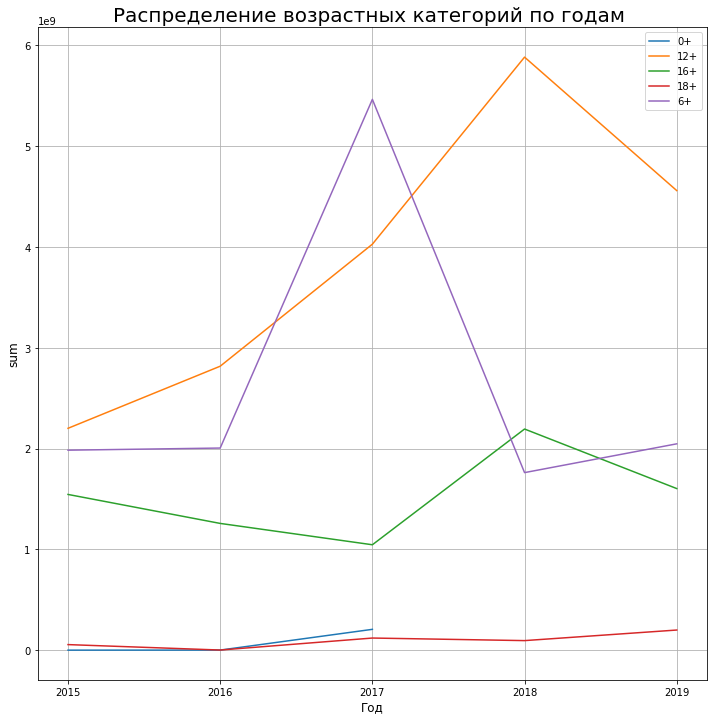

In [59]:
age_restriction(gov_movies, agg_func = 'sum') # вызов функции на построение графика для фильмов с государственным участием 

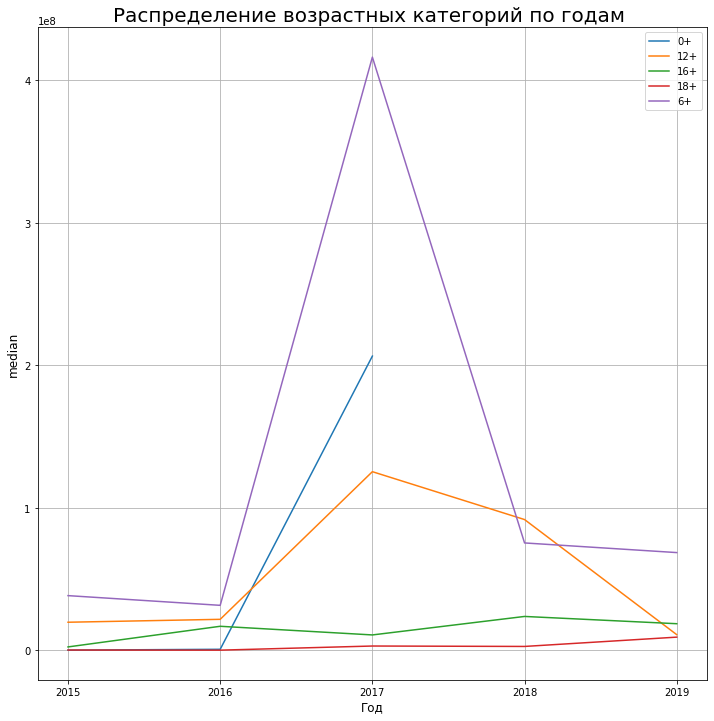

In [60]:
age_restriction(gov_movies, agg_func = 'median')

**Вывод**

Среди фильмов с государственным участием категории смещаются в сторону 6+ и 12+, 12+ является несомненным лидером.

Определить на какие жанры основные государственные средства

In [61]:
gov_movies.assign(
    support=lambda x: (x.refundable_support + x.nonrefundable_support)
).pivot_table( 
            index='main_genre',
            values='support',
            aggfunc=['mean', 'sum','count']
).sort_values(by=[('mean', 'support')], ascending=False)

,mean,sum,count
,support,support,support
main_genre,,,
история,255000000.00,1020000000.00,4
спорт,151666666.67,455000000.00,3
фантастика,127818181.82,1406000000.00,11
приключения,99428571.43,696000000.00,7
детектив,97000000.00,485000000.00,5
фэнтези,93900000.00,1032900000.00,11
криминал,93333333.33,280000000.00,3
мультфильм,79403870.97,2461520000.00,31


Изменялся объем государственной поддержки по годам

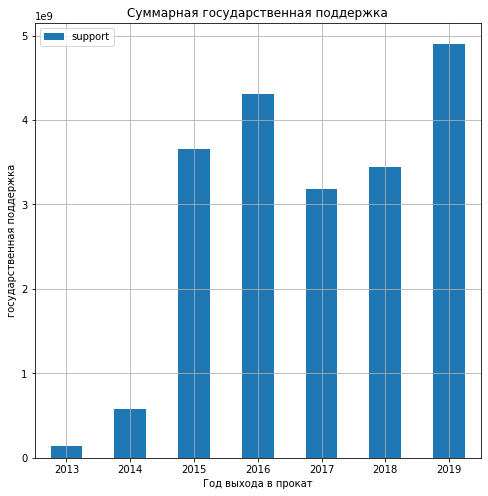

In [62]:
gov_movies.assign(
    support=lambda x: (x.refundable_support + x.nonrefundable_support)
).pivot_table(
    index='show_year',
    values='support',
    aggfunc='sum'
).plot(                                                           # построение столбчатой диаграммы для наглядности  
    kind='bar',
    figsize=(8, 8),
    grid=True,
    title = 'Суммарная государственная поддержка'
)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Год выхода в прокат')
plt.ylabel('государственная поддержка')
plt.show()

## Общий вывод

1. Отечественное кино не может без государсвенной подержки 65-70% бюджета и это государсвенные средства.
2. Государсвенные средства являются не возвратными в большей части (около 86%), так что это именно подержка, а не инвестиции.
3. Окупаемость в среднем меньше единицы (0.82) при это встречаются проекры с высокой окупаемостью.
4. Рейтинг фильма почти не влияет на окупаемость фильма, тут есть ряд факторов:
 - большенство жителей России не имеют возможность поситить кинотеатр, как по экономическим причинам так и по причини их не доступности, многозальные кинотеатры, есть только в городах милиониках. В облосных центрах если и есть кинотеатр, он в один максимум  в два зала, в которых будут показывать более рейтинговое кино.
 - конкуренция с кино из США, у которого бюджеты в десятки и сотни раз больше, в том числе бюджеты на рекламу.
 - предвзятое оношение к отечественому кино.
5. Отечественное кино делает ставку на более  семейное кино (6+ и 12+), а мировой рынок на подростковое (12+ и 16+).